In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [2]:
df = pd.read_csv("final_cleaned_2.csv")

In [3]:
df.count()

Item_Identifier              8322
Item_Weight                  8322
Item_Fat_Content             8322
Item_Visibility              8322
Item_Type                    8322
Item_MRP                     8322
Outlet_Identifier            8322
Outlet_Establishment_Year    8322
Outlet_Size                  8322
Outlet_Location_Type         8322
Outlet_Type                  8322
Item_Outlet_Sales            8322
dtype: int64

In [4]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Cleaning up columns

#### Cleaning up the Item_Fat_Content column

In [5]:
l = len(df["Item_Fat_Content"])
for i in range(l):
    if df["Item_Fat_Content"][i] == "LF" or df["Item_Fat_Content"][i] == "low fat" or df["Item_Fat_Content"][i] == "Low Fat":
        df["Item_Fat_Content"][i] = df["Item_Fat_Content"][i].replace(df["Item_Fat_Content"][i], "L")
    elif df["Item_Fat_Content"][i] == "reg" or df["Item_Fat_Content"][i] == "Regular":
        df["Item_Fat_Content"][i] = df["Item_Fat_Content"][i].replace(df["Item_Fat_Content"][i], "R")

c:\users\harsh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\harsh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [6]:
df["Item_Fat_Content"].value_counts()

L    5395
R    2927
Name: Item_Fat_Content, dtype: int64

In [7]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDB14,20.25,R,0.171939,Canned,92.5120,OUT010,1998,Small,Tier 3,Grocery Store,186.4240
1,FDS52,8.89,L,0.009163,Frozen Foods,101.7016,OUT010,1998,Small,Tier 3,Grocery Store,101.2016
2,NCN07,18.50,L,0.056816,Others,132.1284,OUT010,1998,Small,Tier 3,Grocery Store,263.6568
3,FDI32,17.70,L,0.291865,Fruits and Vegetables,115.1834,OUT010,1998,Small,Tier 3,Grocery Store,345.5502
4,FDR47,17.85,L,0.070088,Breads,196.5794,OUT010,1998,Small,Tier 3,Grocery Store,585.2382


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [9]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDB14,20.25,R,0.171939,Canned,92.5120,OUT010,1998,Small,Tier 3,Grocery Store,186.4240
1,FDS52,8.89,L,0.009163,Frozen Foods,101.7016,OUT010,1998,Small,Tier 3,Grocery Store,101.2016
2,NCN07,18.50,L,0.056816,Others,132.1284,OUT010,1998,Small,Tier 3,Grocery Store,263.6568
3,FDI32,17.70,L,0.291865,Fruits and Vegetables,115.1834,OUT010,1998,Small,Tier 3,Grocery Store,345.5502
4,FDR47,17.85,L,0.070088,Breads,196.5794,OUT010,1998,Small,Tier 3,Grocery Store,585.2382
...,...,...,...,...,...,...,...,...,...,...,...,...
8317,FDC41,15.60,L,0.117095,Frozen Foods,78.0670,OUT049,1999,Medium,Tier 1,Supermarket Type1,1148.5050
8318,FDU59,5.78,L,0.096536,Breads,162.8552,OUT049,1999,Medium,Tier 1,Supermarket Type1,3574.0144
8319,FDG31,12.15,L,0.037955,Meat,62.8826,OUT049,1999,Medium,Tier 1,Supermarket Type1,710.4086
8320,FDV09,12.10,L,0.020601,Snack Foods,147.5734,OUT049,1999,Medium,Tier 1,Supermarket Type1,3414.8882


### Normalizing stuff

In [10]:
df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,20.25,0.171939,92.5120,1998
1,8.89,0.009163,101.7016,1998
2,18.50,0.056816,132.1284,1998
3,17.70,0.291865,115.1834,1998
4,17.85,0.070088,196.5794,1998
...,...,...,...,...
8317,15.60,0.117095,78.0670,1999
8318,5.78,0.096536,162.8552,1999
8319,12.15,0.037955,62.8826,1999
8320,12.10,0.020601,147.5734,1999


In [11]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range=(0, 1))

In [12]:
Item_MRP = min_max.fit_transform(np.array(df['Item_MRP']).reshape(-1,1)).flatten()
Item_MRP = pd.Series(Item_MRP)
Item_MRP

0       0.259857
1       0.298863
2       0.428010
3       0.356086
4       0.701573
          ...   
8317    0.198545
8318    0.558430
8319    0.134095
8320    0.493566
8321    0.483267
Length: 8322, dtype: float64

In [13]:
Item_Weight = min_max.fit_transform(np.array(df['Item_Weight']).reshape(-1,1)).flatten()
Item_Weight = pd.Series(Item_Weight)
Item_Weight

0       0.934504
1       0.258113
2       0.830307
3       0.782673
4       0.791605
          ...   
8317    0.657636
8318    0.072938
8319    0.452218
8320    0.449241
8321    0.168800
Length: 8322, dtype: float64

In [14]:
Outlet_Establishment_Year = min_max.fit_transform(np.array(df['Outlet_Establishment_Year']).reshape(-1,1)).flatten()
Outlet_Establishment_Year = pd.Series(Outlet_Establishment_Year)
Outlet_Establishment_Year

0       0.541667
1       0.541667
2       0.541667
3       0.541667
4       0.541667
          ...   
8317    0.583333
8318    0.583333
8319    0.583333
8320    0.583333
8321    0.583333
Length: 8322, dtype: float64

In [15]:
df['Item_MRP'] = Item_MRP
df['Item_Weight'] = Item_Weight
df['Outlet_Establishment_Year'] = Outlet_Establishment_Year

In [16]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDB14,0.934504,R,0.171939,Canned,0.259857,OUT010,0.541667,Small,Tier 3,Grocery Store,186.4240
1,FDS52,0.258113,L,0.009163,Frozen Foods,0.298863,OUT010,0.541667,Small,Tier 3,Grocery Store,101.2016
2,NCN07,0.830307,L,0.056816,Others,0.428010,OUT010,0.541667,Small,Tier 3,Grocery Store,263.6568
3,FDI32,0.782673,L,0.291865,Fruits and Vegetables,0.356086,OUT010,0.541667,Small,Tier 3,Grocery Store,345.5502
4,FDR47,0.791605,L,0.070088,Breads,0.701573,OUT010,0.541667,Small,Tier 3,Grocery Store,585.2382
...,...,...,...,...,...,...,...,...,...,...,...,...
8317,FDC41,0.657636,L,0.117095,Frozen Foods,0.198545,OUT049,0.583333,Medium,Tier 1,Supermarket Type1,1148.5050
8318,FDU59,0.072938,L,0.096536,Breads,0.558430,OUT049,0.583333,Medium,Tier 1,Supermarket Type1,3574.0144
8319,FDG31,0.452218,L,0.037955,Meat,0.134095,OUT049,0.583333,Medium,Tier 1,Supermarket Type1,710.4086
8320,FDV09,0.449241,L,0.020601,Snack Foods,0.493566,OUT049,0.583333,Medium,Tier 1,Supermarket Type1,3414.8882


In [17]:
Item_Fat_Content = pd.get_dummies(df['Item_Fat_Content']).drop('R', axis = 1)['L']
Item_Fat_Content

0       0
1       1
2       1
3       1
4       1
       ..
8317    1
8318    1
8319    1
8320    1
8321    1
Name: L, Length: 8322, dtype: uint8

In [18]:
df['Item_Fat_Content'] = Item_Fat_Content

In [19]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDB14,0.934504,0,0.171939,Canned,0.259857,OUT010,0.541667,Small,Tier 3,Grocery Store,186.4240
1,FDS52,0.258113,1,0.009163,Frozen Foods,0.298863,OUT010,0.541667,Small,Tier 3,Grocery Store,101.2016
2,NCN07,0.830307,1,0.056816,Others,0.428010,OUT010,0.541667,Small,Tier 3,Grocery Store,263.6568
3,FDI32,0.782673,1,0.291865,Fruits and Vegetables,0.356086,OUT010,0.541667,Small,Tier 3,Grocery Store,345.5502
4,FDR47,0.791605,1,0.070088,Breads,0.701573,OUT010,0.541667,Small,Tier 3,Grocery Store,585.2382
...,...,...,...,...,...,...,...,...,...,...,...,...
8317,FDC41,0.657636,1,0.117095,Frozen Foods,0.198545,OUT049,0.583333,Medium,Tier 1,Supermarket Type1,1148.5050
8318,FDU59,0.072938,1,0.096536,Breads,0.558430,OUT049,0.583333,Medium,Tier 1,Supermarket Type1,3574.0144
8319,FDG31,0.452218,1,0.037955,Meat,0.134095,OUT049,0.583333,Medium,Tier 1,Supermarket Type1,710.4086
8320,FDV09,0.449241,1,0.020601,Snack Foods,0.493566,OUT049,0.583333,Medium,Tier 1,Supermarket Type1,3414.8882


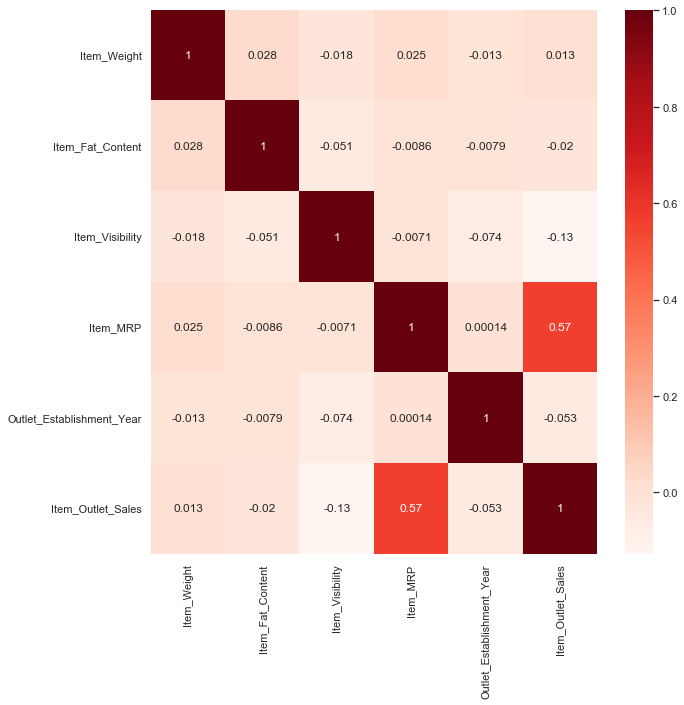

In [20]:
#Using Pearson Correlation
plt.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [21]:
#Correlation with output variable
cor_target = abs(cor['Item_Outlet_Sales'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.25]
relevant_features

Item_MRP             0.566667
Item_Outlet_Sales    1.000000
Name: Item_Outlet_Sales, dtype: float64

In [22]:
df['Outlet_Size'].value_counts()

Small     4686
Medium    2721
High       915
Name: Outlet_Size, dtype: int64

In [23]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1208
Snack Foods              1161
Household                 891
Frozen Foods              836
Dairy                     660
Canned                    637
Baking Goods              632
Health and Hygiene        508
Soft Drinks               439
Meat                      414
Breads                    246
Hard Drinks               210
Others                    168
Starchy Foods             141
Breakfast                 107
Seafood                    64
Name: Item_Type, dtype: int64

In [24]:
pd.get_dummies(df['Outlet_Size'])

,High,Medium,Small
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
8317,0,1,0
8318,0,1,0
8319,0,1,0
8320,0,1,0


In [25]:
df = df.join(pd.get_dummies(df['Outlet_Size'])).drop('Outlet_Size', axis = 1)

In [26]:
df = df.join(pd.get_dummies(df['Outlet_Location_Type'])).drop('Outlet_Location_Type', axis = 1)

In [27]:
df = df.join(pd.get_dummies(df['Outlet_Type'])).drop('Outlet_Type', axis = 1)

In [28]:
# df = df.join(pd.get_dummies(df['Outlet_Identifier'])).drop('Outlet_Identifier', axis = 1)
df = df.drop(axis=1, columns='Outlet_Identifier')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDB14,0.934504,0,0.171939,Canned,0.259857,0.541667,186.4240,0,0,1,0,0,1,1,0,0,0
1,FDS52,0.258113,1,0.009163,Frozen Foods,0.298863,0.541667,101.2016,0,0,1,0,0,1,1,0,0,0
2,NCN07,0.830307,1,0.056816,Others,0.428010,0.541667,263.6568,0,0,1,0,0,1,1,0,0,0
3,FDI32,0.782673,1,0.291865,Fruits and Vegetables,0.356086,0.541667,345.5502,0,0,1,0,0,1,1,0,0,0
4,FDR47,0.791605,1,0.070088,Breads,0.701573,0.541667,585.2382,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8317,FDC41,0.657636,1,0.117095,Frozen Foods,0.198545,0.583333,1148.5050,0,1,0,1,0,0,0,1,0,0
8318,FDU59,0.072938,1,0.096536,Breads,0.558430,0.583333,3574.0144,0,1,0,1,0,0,0,1,0,0
8319,FDG31,0.452218,1,0.037955,Meat,0.134095,0.583333,710.4086,0,1,0,1,0,0,0,1,0,0
8320,FDV09,0.449241,1,0.020601,Snack Foods,0.493566,0.583333,3414.8882,0,1,0,1,0,0,0,1,0,0


In [29]:
df = df.join(pd.get_dummies(df['Item_Type'])).drop('Item_Type', axis = 1)

In [30]:
# df = df.join(pd.get_dummies(df['Item_Identifier'])).drop('Item_Identifier', axis = 1)
# df.columns
df = df.drop(axis=1, columns='Item_Identifier')

df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,High,Medium,Small,Tier 1,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0.934504,0,0.171939,0.259857,0.541667,186.4240,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.258113,1,0.009163,0.298863,0.541667,101.2016,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.830307,1,0.056816,0.428010,0.541667,263.6568,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0.782673,1,0.291865,0.356086,0.541667,345.5502,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0.791605,1,0.070088,0.701573,0.541667,585.2382,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8317,0.657636,1,0.117095,0.198545,0.583333,1148.5050,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
8318,0.072938,1,0.096536,0.558430,0.583333,3574.0144,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
8319,0.452218,1,0.037955,0.134095,0.583333,710.4086,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
8320,0.449241,1,0.020601,0.493566,0.583333,3414.8882,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [31]:
#Using Pearson Correlation
# plt.figure(figsize=(25,25))
# cor = df.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()

In [32]:
#Correlation with output variable
# cor_target = abs(cor['Item_Outlet_Sales'])
# #Selecting highly correlated features
# relevant_features = cor_target[cor_target>0.25]
# relevant_features

In [33]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,High,Medium,Small,Tier 1,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0.934504,0,0.171939,0.259857,0.541667,186.4240,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.258113,1,0.009163,0.298863,0.541667,101.2016,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.830307,1,0.056816,0.428010,0.541667,263.6568,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0.782673,1,0.291865,0.356086,0.541667,345.5502,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0.791605,1,0.070088,0.701573,0.541667,585.2382,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8317,0.657636,1,0.117095,0.198545,0.583333,1148.5050,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
8318,0.072938,1,0.096536,0.558430,0.583333,3574.0144,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
8319,0.452218,1,0.037955,0.134095,0.583333,710.4086,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
8320,0.449241,1,0.020601,0.493566,0.583333,3414.8882,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import explained_variance_score
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso

In [35]:
y= df.Item_Outlet_Sales
X=df.drop('Item_Outlet_Sales',axis=1)

In [36]:
x_train,x_test,y_train,y_test= train_test_split(X, y, test_size=0.75,random_state = 0)

In [37]:
#Multiple linear regression
lr = LinearRegression()
lr.fit(x_train,y_train)

accuracy=lr.score(x_train,y_train)
accuracy

0.547815445076191

In [38]:
predy=lr.predict(x_test)
y=lr.predict(x_train)
c=explained_variance_score(y_train,y)
d=explained_variance_score(y_test,predy)
c,d

(0.5478540208152738, 0.5647428971149742)

In [39]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [40]:
accuracy1=regr.score(x_test,y_test)
accuracy1

0.5645730110593152

In [41]:
x_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,High,Medium,Small,Tier 1,Tier 2,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
1588,0.642751,1,0.020442,0.785917,0.916667,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
5849,0.880917,0,0.049736,0.193441,0.708333,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
5192,0.732063,0,0.159826,0.697194,0.791667,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5000,0.119976,1,0.096862,0.690548,0.791667,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
4738,0.901756,1,0.066923,0.609287,0.791667,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,0.186365,1,0.025354,0.480419,0.000000,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7891,0.276273,0,0.117667,0.544434,0.583333,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4859,0.117297,1,0.090279,0.235563,0.791667,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
3264,0.842215,0,0.091951,0.649152,1.000000,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [42]:
y_train

1588    5426.2700
5849    1571.2880
5192    4262.4516
5000    2316.9840
4738    2999.4290
          ...    
4373    3661.9000
7891    1283.6624
4859    1975.4286
3264    1277.0044
2732    5552.1062
Name: Item_Outlet_Sales, Length: 2080, dtype: float64

In [43]:
x_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,High,Medium,Small,Tier 1,Tier 2,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
1364,0.064007,0,0.024521,0.303655,0.083333,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1870,0.065496,1,0.176071,0.478442,0.916667,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
5421,0.895802,1,0.025282,0.512365,0.791667,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
5190,0.532599,0,0.067860,0.122523,0.791667,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2337,0.176541,0,0.044272,0.637122,0.916667,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5895,0.461149,0,0.046453,0.116581,0.708333,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
8295,0.359929,0,0.033104,0.074749,0.583333,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7689,0.815421,1,0.054319,0.465306,0.583333,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2965,0.940458,1,0.054277,0.365268,1.000000,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [44]:
# lab_enc = preprocessing.LabelEncoder()
# training_scores_encoded = lab_enc.fit_transform(y_train)

In [45]:
# knn_model=KNeighborsClassifier(n_neighbors=5)

# # neigh = KNeighborsClassifier(n_neighbors=3)
# # neigh.fit(train[["time_in_hospital","num_lab_procedures","num_procedures","num_medications","number_outpatient","number_emergency","number_inpatient"]], train["readmit_soon"])
# knn_model.fit(x_train, training_scores_encoded)
# knn_pred=knn_model.predict(x_test)

In [46]:
# accuracy_score(y_test,knn_pred)

In [47]:
#Ridge Regression
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train) 
# pred_train_rr= rr.predict(x_train)
# print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
# print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))
# print(rr.score(x_test, y_test))
# print(r2_score(y_test, pred_test_rr))

1124.9088197906574
0.5658708662164428


In [48]:
#Lasso Regression
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train) 
# pred_train_lasso= model_lasso.predict(x_train)
# print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
# print(r2_score(y_train, pred_train_lasso))

# pred_test_lasso= model_lasso.predict(x_test)
# print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
# print(r2_score(y_test, pred_test_lasso))

print(model_lasso.score(x_test, y_test))

0.5658872224761423


In [49]:
#SVR
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)

# pred_train_reg= regressor.predict(x_train)
# print(np.sqrt(mean_squared_error(y_train,pred_train_reg)))
# print(r2_score(y_train, pred_train_reg))

# pred_test_reg= regressor.predict(x_test)
# print(np.sqrt(mean_squared_error(y_test,pred_test_reg))) 
# print(r2_score(y_test, pred_test_reg))

print(regressor.score(x_test, y_test))

-0.020919208200921524


In [50]:
#KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=5)
reg.fit(x_train, y_train)
print(reg.score(x_test, y_test))

c:\users\harsh\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


0.41643258699438346
